In [1]:
import scipy.io as sp
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
data = sp.loadmat('S1.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'sub', 'Fs', 'N', 'T', 'exemplarLabels', 'categoryLabels', 'X_2D', 'X_3D'])


In [21]:
print(data['exemplarLabels'].shape)

(1, 5188)


In [4]:
matrix = data['X_3D'].transpose(2,0,1)

In [5]:
matrix = np.reshape(matrix,(matrix.shape[0], matrix.shape[1]*matrix.shape[2]))
matrix = preprocessing.scale(matrix)

In [6]:
matrix.shape

(5188, 3968)

In [8]:
cat_labels = data['categoryLabels'].transpose()
cat_labels = np.reshape(cat_labels, (cat_labels.shape[0]*cat_labels.shape[1]))

In [9]:
print(cat_labels.shape)

(5188,)


In [10]:
k = 0.8
n = matrix.shape[0]
x_train = matrix[:int(k*n)]
x_test = matrix[int(k*n)+1:]
y_train = cat_labels[:int(k*n)]
y_test = cat_labels[int(k*n)+1:]
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [66]:
def split_sampling(matrix, cat_labels, k = 0.8):
    n = matrix.shape[0]
    indices = np.random.permutation(n)
    training_idx, test_idx = indices[:int(k*n)], indices[int(k*n):]
    #print(int(k*n))
    x_train, x_test = matrix[training_idx], matrix[test_idx]
    y_train, y_test = cat_labels[training_idx], cat_labels[test_idx]
    #print(indices)
    return x_train, y_train, x_test, y_test

In [74]:
def split_sampling2D(matrix, cat_labels, k = 0.8):
    n = matrix.shape[0]
    indices = np.random.permutation(n)
    training_idx, test_idx = indices[:int(k*n)], indices[int(k*n):]
    #print(int(k*n))
    x_train, x_test = matrix[training_idx,:], matrix[test_idx,:]
    y_train, y_test = cat_labels[training_idx], cat_labels[test_idx]
    #print(indices)
    return x_train, y_train, x_test, y_test

In [25]:
print(str(x_train.shape)+" "+str(x_test.shape)+" "+str(y_train.shape)+" "+str(y_test.shape))

(4150, 3968) (1038, 3968) (4150,) (1038,)


In [43]:
def lda_with_shrinkage(x_train, y_train, x_test, y_test):
    clf = LDA(solver = 'eigen',shrinkage = True)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    return accuracy_score(pred,y_test)

In [31]:
linear_clf = svm.SVC(kernel = 'linear',verbose = True)
linear_clf.fit(x_train, y_train)
linear_svm_pred = linear_clf.predict(x_test)
accuracy_score(linear_svm_pred,y_test)

[LibSVM]

0.4113680154142582

In [69]:
electrode = data['X_3D']
sh0 = electrode.shape[0];
sh1 = electrode.shape[1];
sh2 = electrode.shape[2];
acc = [];
for l in range(sh0):
    temp = []
    for k in range(sh1):
        x_tr = []; y_tr = [];
        for i in range(sh2):
            x_tr.append(electrode[l][k][i]);
            y_tr.append(cat_labels[i]);
        x_tr = np.array(x_tr)
        y_tr = np.array(y_tr)
        # use x_tr & y_tr to get accuracy and store it in acc_score
        x_train, y_train, x_test, y_test = split_sampling(x_tr, y_tr)
        x_train = np.reshape(x_train, newshape = (x_train.shape[0],1))
        x_test = np.reshape(x_test, newshape = (x_test.shape[0],1))
        #print(str(x_train.shape)+" "+str(y_train.shape) )
        #print(str(x_tr.shape)+" " +str(l)+ " " + str(k))
        temp.append(lda_with_shrinkage(x_train, y_train,x_test, y_test));
    acc.append(temp);
# you have acc as 2D matrix (of size 124*32) with every value denoting accuracy accordingly.
# Plot graph of accuracy.

c:\users\naitik dodia\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [70]:
print(acc)

[[0.14932562620423892, 0.1531791907514451, 0.13583815028901733, 0.14450867052023122, 0.15414258188824662, 0.1628131021194605, 0.151252408477842, 0.15414258188824662, 0.17341040462427745, 0.13872832369942195, 0.1599229287090559, 0.151252408477842, 0.15895953757225434, 0.1608863198458574, 0.15221579961464354, 0.1531791907514451, 0.1464354527938343, 0.14547206165703275, 0.1416184971098266, 0.15221579961464354, 0.14354527938342967, 0.16184971098265896, 0.15510597302504817, 0.1599229287090559, 0.14450867052023122, 0.14258188824662812, 0.14836223506743737, 0.14932562620423892, 0.15414258188824662, 0.15414258188824662, 0.15510597302504817, 0.151252408477842], [0.15510597302504817, 0.14836223506743737, 0.15510597302504817, 0.14932562620423892, 0.15028901734104047, 0.1579961464354528, 0.15221579961464354, 0.15221579961464354, 0.151252408477842, 0.14547206165703275, 0.1579961464354528, 0.15221579961464354, 0.14836223506743737, 0.1599229287090559, 0.15414258188824662, 0.1531791907514451, 0.154142

In [71]:
import matplotlib.pyplot as plt

([array([ 0.,  2.,  8., 15.,  6.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  5., 22.,  5.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  9., 11., 11.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  4., 20.,  5.,  2.,  0.,  1.,  0.,  0.]),
  array([ 1.,  0.,  4., 13.,  8.,  4.,  1.,  1.,  0.,  0.]),
  array([ 0.,  3.,  6., 13.,  8.,  2.,  0.,  0.,  0.,  0.]),
  array([ 1.,  1.,  5., 17.,  5.,  2.,  1.,  0.,  0.,  0.]),
  array([ 1.,  3.,  8., 12.,  7.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  7., 12.,  9.,  2.,  1.,  0.,  1.,  0.]),
  array([ 0.,  1., 12., 16.,  2.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  1.,  3., 16., 11.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  4., 16., 10.,  1.,  0.,  0.,  1.,  0.]),
  array([ 0.,  0.,  7., 19.,  5.,  0.,  1.,  0.,  0.,  0.]),
  array([ 0.,  5., 10.,  9.,  3.,  4.,  1.,  0.,  0.,  0.]),
  array([ 0.,  1.,  7., 11., 12.,  1.,  0.,  0.,  0.,  0.]),
  array([ 0.,  1.,  7., 14.,  7.,  3.,  0.,  0.,  0.,  0.]),
  array([ 0.,  0.,  9., 

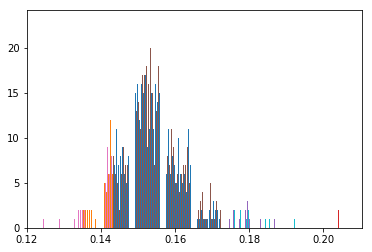

In [72]:
plt.hist(acc)

In [76]:
sh0 = electrode.shape[0];
sh1 = electrode.shape[1];
sh2 = electrode.shape[2];
acc = [];
for l in range(sh0):
    x_tr = []; y_tr = [];
    for i in range(sh2):
        temp = [];
        for k in range(sh1):
            temp.append(electrode[l][k][i]);
        x_tr.append(temp);
        y_tr.append(cat_labels[i])
    x_tr = np.array(x_tr)
    y_tr = np.array(y_tr)
    # use x_tr & y_tr to get accuracy and store it in acc_score
    x_train, y_train, x_test, y_test = split_sampling2D(x_tr, y_tr)
    acc_score = lda_with_shrinkage(x_train, y_train, x_test, y_test)
    acc.append(acc_score);
# you have acc as 2D matrix (of size 124) with every value denoting accuracy accordingly.
# Plot graph of accuracy.

c:\users\naitik dodia\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


(array([2., 1., 1., 1., 1., 1., 2., 2., 1., 4., 3., 1., 1., 0., 3., 0., 0.,
        0., 1., 1., 2., 5., 1., 1., 0., 0., 2., 3., 0., 2., 2., 3., 0., 3.,
        1., 1., 5., 1., 2., 1., 1., 3., 3., 6., 2., 2., 0., 0., 1., 5., 3.,
        1., 0., 1., 0., 2., 2., 0., 2., 0., 2., 0., 0., 1., 2., 2., 0., 0.,
        1., 0., 0., 0., 1., 1., 1., 0., 2., 0., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 1., 2., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1.]),
 array([0.1416185 , 0.14271397, 0.14380944, 0.1449049 , 0.14600037,
        0.14709584, 0.14819131, 0.14928678, 0.15038225, 0.15147772,
        0.15257319, 0.15366866, 0.15476412, 0.15585959, 0.15695506,
        0.15805053, 0.159146  , 0.16024147, 0.16133694, 0.16243241,
        0.16352788, 0.16462335, 0.16571881, 0.16681428, 0.16790975,
        0.16900522, 0.17010069, 0.17119616, 0.17229163, 0.1733871 ,
        0.17448257, 0.17557803

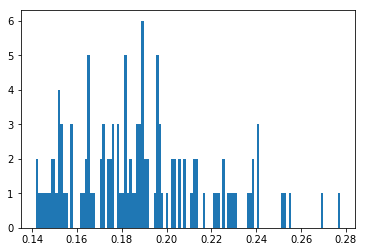

In [79]:
plt.hist(acc, bins = 124)

In [80]:
print(acc)

[0.18786127167630057, 0.17148362235067438, 0.19171483622350674, 0.16473988439306358, 0.17822736030828518, 0.19653179190751446, 0.1859344894026975, 0.18304431599229287, 0.18786127167630057, 0.16377649325626203, 0.14354527938342967, 0.18689788053949905, 0.1955684007707129, 0.1531791907514451, 0.1955684007707129, 0.16570327552986513, 0.17630057803468208, 0.174373795761079, 0.18689788053949905, 0.18882466281310212, 0.18400770712909442, 0.18882466281310212, 0.18689788053949905, 0.2023121387283237, 0.17533718689788053, 0.19171483622350674, 0.1955684007707129, 0.16666666666666666, 0.22736030828516376, 0.20809248554913296, 0.17822736030828518, 0.17341040462427745, 0.18400770712909442, 0.14450867052023122, 0.1416184971098266, 0.19845857418111754, 0.1628131021194605, 0.17052023121387283, 0.1579961464354528, 0.14836223506743737, 0.18978805394990367, 0.1464354527938343, 0.18208092485549132, 0.18882466281310212, 0.15221579961464354, 0.17148362235067438, 0.17052023121387283, 0.15221579961464354, 0.1

In [81]:
sh0 = electrode.shape[0];
sh1 = electrode.shape[1];
sh2 = electrode.shape[2];
acc = [];
for k in range(sh1):
    x_tr = []; y_tr = [];
    for i in range(sh2):
        temp = [];
        for l in range(sh0):
            temp.append(electrode[l][k][i]);
        x_tr.append(temp);
        y_tr.append(cat_labels[i]);
    x_tr = np.array(x_tr)
    y_tr = np.array(y_tr)
    # use x_tr & y_tr to get accuracy and store it in acc_score
    x_train, y_train, x_test, y_test = split_sampling2D(x_tr, y_tr)
    acc_score = lda_with_shrinkage(x_train, y_train, x_test, y_test)
    # use x_tr & y_tr to get accuracy and store it in acc_score
    acc.append(acc_score);
# you have acc as 2D matrix (of size 32) with every value denoting accuracy accordingly.
# Plot graph of accuracy.


c:\users\naitik dodia\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


[0.1599229287090559, 0.15221579961464354, 0.15221579961464354, 0.1608863198458574, 0.15606936416184972, 0.17341040462427745, 0.18208092485549132, 0.17052023121387283, 0.1859344894026975, 0.21579961464354527, 0.22350674373795762, 0.2003853564547206, 0.23892100192678228, 0.21772639691714837, 0.1936416184971098, 0.18882466281310212, 0.22447013487475914, 0.20423892100192678, 0.1994219653179191, 0.220616570327553, 0.22157996146435452, 0.21483622350674375, 0.20134874759152216, 0.1859344894026975, 0.19845857418111754, 0.19845857418111754, 0.21290944123314065, 0.2254335260115607, 0.2186897880539499, 0.1936416184971098, 0.197495183044316, 0.1859344894026975]


(array([2., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 3., 1., 0., 2., 1.,
        4., 1., 1., 0., 0., 1., 2., 2., 2., 2., 1., 0., 0., 0., 1.]),
 array([0.1522158 , 0.15492534, 0.15763487, 0.16034441, 0.16305395,
        0.16576349, 0.16847303, 0.17118256, 0.1738921 , 0.17660164,
        0.17931118, 0.18202071, 0.18473025, 0.18743979, 0.19014933,
        0.19285886, 0.1955684 , 0.19827794, 0.20098748, 0.20369701,
        0.20640655, 0.20911609, 0.21182563, 0.21453516, 0.2172447 ,
        0.21995424, 0.22266378, 0.22537331, 0.22808285, 0.23079239,
        0.23350193, 0.23621146, 0.238921  ]),
 <a list of 32 Patch objects>)

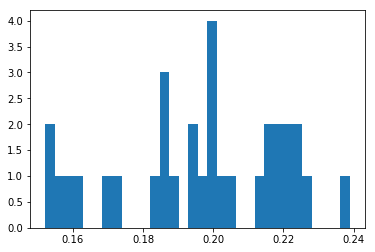

In [83]:
print(acc)
plt.hist(acc, bins = 32)